Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Syed Ragib Shariar"
COLLABORATORS = ""

---

## CSE330 Lab: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$

### Tasks: 
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [2]:
class Newtons_Divided_Differences:
  
    def __init__(self, differences):
        self.differences = differences

    def __call__(self, x):
        '''
        this function is for calculating y from given x using all the difference coefficients
        x can be a single value or a numpy
        the formula being used:
        f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]

        work on this after implementing 'calc_div_diff'. Then you should have
        f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

        'res' variable must return all the results (corresponding y for x)
        '''

        res = np.zeros(len(x)) #Initialization to avoid runtime error. You can change this line if you wish

        #----------------------------------------------
        # YOUR CODE HERE
        #raise NotImplementedError()
        n = len(data_x) - 1 # Degree of polynomial
        res = self.differences[n]
        for k in range(1,n+1):
            res = self.differences[n-k] + (x -data_x[n-k])*res
        #----------------------------------------------
        
        return res


In [4]:
# basic rule for calculating the difference, implanted in the lambda function. 
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    #write this function to calculate all the divided differences in the list 'b'
    b = []  #initializing
    #----------------------------------------------
    # YOUR CODE HERE
    #raise NotImplementedError()
    m = len(x)
    x = np.copy(x)
    b = np.copy(y)
    for k in range(1,m):
        b[k:m] = (b[k:m] - b[k-1])/(x[k:m] - x[k-1])
    #----------------------------------------------
    return b

In [5]:
# Test case for the calc_div_diff(x,y) function.

data_x = [-3.,-2.,-1.,0.,1.,3.,4.]
data_y = [-60.,-80.,6.,1.,45.,30.,16.]

test = calc_div_diff(data_x, data_y)

assert len(test) == len(data_x)

answer = np.array([-60.0, -20.0, 53.0, -32.833333333333336, 
                   14.041666666666668, -3.465277777777778, 
                   0.723214285714286])

np.testing.assert_array_almost_equal(test, answer)

NameError: name 'np' is not defined

### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

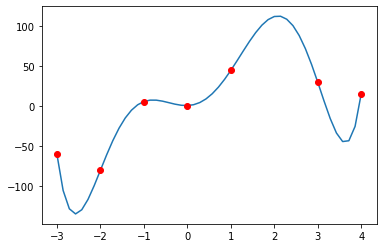

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-3.,-2.,-1.,0.,1.,3.,4.])
data_y = np.array([-60.,-80.,6.,1.,45.,30.,16.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences))
test_x = np.linspace(-3, 4, 50, endpoint=True)
test_y = p(test_x)

#generating 50 points from -3 to 4 in order to create a smooth line
plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()


results = np.array([-60.0, -105.23677816458886, -128.1501957598652, 
                    -134.5698281692638, -129.35687268302934, 
                    -116.50044381410564, -99.20944261562542, -80.0, 
                    -60.77849405960992, -42.92014138909567, 
                    -27.343162409248826, -14.578520692503815, 
                    -4.8352362900297905, 1.9387269395769309, 6.0, 
                    7.757773425309907, 7.726187946470304, 
                    6.48115115624401, 4.621580172498582, 
                    2.73507029991147, 1.3679896900748787, 
                    0.9999999999999858, 2.023003049021085, 
                    4.724513474099069, 9.275457383524568, 
                    15.722397009020696, 23.98418135624567, 
                    33.85302285369433, 44.99999999999997, 
                    56.98498600963552, 69.27100345701427, 
                    81.24300491899024, 92.23107961575772, 
                    101.53808605015163, 108.47171064534578, 
                    112.38095238095241, 112.69703342751961, 
                    108.97873577943079, 100.96216388620053, 
                    88.61493328217216, 72.19478521461551, 
                    52.312627270221, 30.0, 6.780969542573828, 
                    -15.251553754124913, -33.35507071276192, 
                    -44.05232270810331, -43.04169505012584, 
                    -25.103194368721717, 16.000000000000426])

np.testing.assert_array_almost_equal(test_y, results, decimal=3)